<a href="https://colab.research.google.com/github/dilipkpgit/aiml-nlp/blob/main/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### Business Context

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships. As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously. One of the most effective strategies at your disposal is to harness the power of Support Ticket Categorization.


### Objective

Develop an advanced support ticket categorization system that accurately classifies incoming tickets, assigns relevant tags based on their content, implements mechanisms and generate the first response based on the sentiment for prioritizing tickets for prompt resolution.


## **Installing and Importing Necessary Libraries and Dependencies**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 156.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 pandas==1.5.3 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.0 which is incompatible.
transformers 4.41.2 requires huggingface-hub<1.0,>=0.23.0, but you have huggingface-hub 0.20.3 which is incompatible.


In [ ]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# for loading and manipulating data
import pandas as pd

# setting column to the maximum column width as per the data
pd.set_option('max_colwidth', None)

# for time computations
import time

# for Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the Data**

In [ ]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the CSV file
data = pd.read_csv("/content/drive/MyDrive/DataScience/NLP/Support_ticket_text_data_mid_term.csv")

## **Data Overview**

### Checking the first 5 rows of the data

In [ ]:
# Checking the first 5 rows of the data
pd.set_option('max_colwidth', None)
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly."
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem."
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?"


### Checking the shape of the data

In [ ]:
# Complete the code to check the shape of the data
print ("The data has {} rows and columns {}".format(data.shape[0],data.shape[1]))

The data has 21 rows and columns 2


### Checking the missing values in the data

In [ ]:
# Complete the code to check for missing values in the data
print(data.isnull().sum())
print("*"*50)
data.info()

support_tick_id        0
support_ticket_text    0
dtype: int64
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes




*   **No missing values in the dataset**



## **Model Building**

### Loading the model

In [ ]:
# Defining model name, path and file name
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [ ]:
# Downloading Llama-2 model from Hugging Face Model Hub
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [ ]:
# Setting up Llama2 model
llm = Llama(
     model_path=model_path,
     n_ctx=1024, # Context window
 )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Utility functions

In [ ]:
# Defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## **Task 1: Ticket Categorization and Returning Structured Output**

In [ ]:
# Creating a copy of the Original dataset
data_1 = data.copy()

In [ ]:
#Defining the response funciton for Task 1 - Categorization.
def response_1(prompt,ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      A:
      """,
      max_tokens=1024,
      stop=["Q:", "\n"],
      top_p=0.95,
      #repeat_penalty=1.2,
      top_k=75,
      temperature=0.5,
      echo=False,
    )
    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [ ]:
# Defining the Prompt to generate Categories
prompt_1 = """
    You are an AI analyzing support tickets. Classify the given ticket into one of the following categories depending on the content of the ticket:
    - Hardware Issue
    - Network/Wifi Issue
    - Data Recovery Issue
    - Technical Issue
    - User Issue

    Format the output as a JSON object with a single key-value pair as shown below:
    {"Category": "your_category_prediction"}
"""

In [ ]:
# Running the model to determine the Categories
start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1, x))
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Model Execution time
print("Time taken ",(end-start))

Time taken  276.08053636550903


In [ ]:
# Checking the first five rows of the data to confirm whether the new column has been added
data_1.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{""Category"": ""Network/Wifi Issue""}",{'Category': 'Network/Wifi Issue'}
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{""Category"": ""Hardware Issue""}",{'Category': 'Hardware Issue'}
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{""Category"": ""Data Recovery Issue""}",{'Category': 'Data Recovery Issue'}
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{""Category"": ""Network/Wifi Issue""}",{'Category': 'Network/Wifi Issue'}
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{""Category"": ""Hardware Issue""}",{'Category': 'Hardware Issue'}


In [ ]:
# Setting Index to print the ticket and model response
i = 2
print("Support Ticket = ",data_1.loc[i, 'support_ticket_text'])

# Displaying corresponding Category
print("Model Response",data_1.loc[i, 'model_response'])

Support Ticket =  I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
Model Response {"Category": "Data Recovery Issue"}


In [ ]:
# Applying the custom function to extract model response from JSON data
data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head()

0     {'Category': 'Network/Wifi Issue'}
1         {'Category': 'Hardware Issue'}
2    {'Category': 'Data Recovery Issue'}
3     {'Category': 'Network/Wifi Issue'}
4         {'Category': 'Hardware Issue'}
Name: model_response_parsed, dtype: object

In [ ]:
# Displaying Model responses and value counts
data_1['model_response_parsed'].value_counts()

{'Category': 'Hardware Issue'}         6
{'Category': 'Network/Wifi Issue'}     4
{'Category': 'Data Recovery Issue'}    4
{}                                     4
{'Category': 'Technical Issue'}        2
{'Category': 'User Issue'}             1
Name: model_response_parsed, dtype: int64

In [ ]:
# Normalizing the model_response_parsed column to strip only the value
model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head()

,Category
0,Network/Wifi Issue
1,Hardware Issue
2,Data Recovery Issue
3,Network/Wifi Issue
4,Hardware Issue


In [ ]:
# Concatinating the two dataframes
data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{""Category"": ""Network/Wifi Issue""}",{'Category': 'Network/Wifi Issue'},Network/Wifi Issue
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{""Category"": ""Hardware Issue""}",{'Category': 'Hardware Issue'},Hardware Issue
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{""Category"": ""Data Recovery Issue""}",{'Category': 'Data Recovery Issue'},Data Recovery Issue
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{""Category"": ""Network/Wifi Issue""}",{'Category': 'Network/Wifi Issue'},Network/Wifi Issue
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{""Category"": ""Hardware Issue""}",{'Category': 'Hardware Issue'},Hardware Issue


In [ ]:
# Creating Final dataframe with only Category feature by dropping model_response and model_response_parsed columns
final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",Network/Wifi Issue
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",Hardware Issue
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",Data Recovery Issue
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",Network/Wifi Issue
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",Hardware Issue


## **Task 2: Creating Tags**

In [ ]:
# Creating a copy of the Original dataframe to determine Tags
data_2 = data.copy()

In [ ]:
# Defining the response function to Create Tags.
def response_2(prompt,ticket,category):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      A:
      """,
      max_tokens=1024,
      stop=["Q:", "\n"],
      top_p=0.95,
      top_k=50,
      temperature=0.75,
      echo=False,
    )
    temp_output = model_output["choices"][0]["text"]
    try:
        final_output = temp_output[temp_output.index('{'):]
    except:
        final_output = temp_output

    return final_output

In [ ]:
# Defining the Prompt to generate Tags
prompt_2 = """
    You are an AI analyzing support tickets. Extract Generic Tags from the given ticket using ticket details and Category.

    Output should only contain Tags.
    Format the output as a JSON object with a single key-value pair as shown below:
    {"Tags": "your_tag_prediction"}
"""

In [ ]:
# Executing the model to generate Tags
start = time.time()
data_2["model_response"]=final_data_1[['support_ticket_text','Category']].apply(lambda x: response_2(prompt_2, x[0],x[1]),axis =1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Model Execution time
print("Time taken to Generate Tags : ",end-start)

Time taken to Generate Tags :  311.49131965637207


In [ ]:
# Checking the first five rows of the data to confirm whether the new column has been added
data_2.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{""Tags"": [""Network"", ""Wifi"", ""Connectivity"", ""Internet"", ""Slow"", ""Disruption""]}","{'Tags': ['Internet', 'Connectivity', 'Slow_speed', 'Disconnection']}"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{""Tags"": [""Hardware"", ""Laptop"", ""Startup problem"", ""Urgent""]}","{'Tags': ['Urgent', 'Hardware', 'Startup Issue']}"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{""Tags"": [""Data Loss"", ""Document Recovery""]}","{'Tags': ['data_loss', 'document_recovery']}"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{""Tags"": [""Wi-Fi Signal Weakness"", ""Network Troubleshooting""]}","{'Tags': ['WiFi', 'Signal Strength', 'Network Issue']}"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{""Tags"": [""Battery Drain"", ""Hardware""]}",{}


In [ ]:
# Setting Index to print the ticket and model response
i = 2
print("Support Ticket = ",data_2.loc[i, 'support_ticket_text'])

# Displaying corresponding Tags
print("Model Response",data_2.loc[i, 'model_response'])

Support Ticket =  I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
Model Response {"Tags": ["Data Loss", "Document Recovery"]}


In [ ]:
# Applying the function to the model response to extract Tags from JSON
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)

In [ ]:
data_2["model_response_parsed"]

0                            {'Tags': ['Network', 'Wifi', 'Connectivity', 'Internet', 'Slow', 'Disruption']}
1                                              {'Tags': ['Hardware', 'Laptop', 'Startup problem', 'Urgent']}
2                                                               {'Tags': ['Data Loss', 'Document Recovery']}
3                                             {'Tags': ['Wi-Fi Signal Weakness', 'Network Troubleshooting']}
4                                                                    {'Tags': ['Battery Drain', 'Hardware']}
5                                                  {'Tags': ['Account_Lockout', 'Password_Reset', 'Urgent']}
6                                                                                                         {}
7                                                                {'Tags': ['Hardware', 'Blue Screen Error']}
8                                                                  {'Tags': ['Hard Drive', 'Data Recovery']}
9                  

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

,Tags
0,"[Network, Wifi, Connectivity, Internet, Slow, Disruption]"
1,"[Hardware, Laptop, Startup problem, Urgent]"
2,"[Data Loss, Document Recovery]"
3,"[Wi-Fi Signal Weakness, Network Troubleshooting]"
4,"[Battery Drain, Hardware]"


In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Tags
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{""Tags"": [""Network"", ""Wifi"", ""Connectivity"", ""Internet"", ""Slow"", ""Disruption""]}","{'Tags': ['Network', 'Wifi', 'Connectivity', 'Internet', 'Slow', 'Disruption']}","[Network, Wifi, Connectivity, Internet, Slow, Disruption]"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{""Tags"": [""Hardware"", ""Laptop"", ""Startup problem"", ""Urgent""]}","{'Tags': ['Hardware', 'Laptop', 'Startup problem', 'Urgent']}","[Hardware, Laptop, Startup problem, Urgent]"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{""Tags"": [""Data Loss"", ""Document Recovery""]}","{'Tags': ['Data Loss', 'Document Recovery']}","[Data Loss, Document Recovery]"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{""Tags"": [""Wi-Fi Signal Weakness"", ""Network Troubleshooting""]}","{'Tags': ['Wi-Fi Signal Weakness', 'Network Troubleshooting']}","[Wi-Fi Signal Weakness, Network Troubleshooting]"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{""Tags"": [""Battery Drain"", ""Hardware""]}","{'Tags': ['Battery Drain', 'Hardware']}","[Battery Drain, Hardware]"


In [ ]:
# Dropping model_response and model_response_parsed columns to create final dataframe with ticket details and Tags
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,Tags
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","[Network, Wifi, Connectivity, Internet, Slow, Disruption]"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","[Hardware, Laptop, Startup problem, Urgent]"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","[Data Loss, Document Recovery]"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","[Wi-Fi Signal Weakness, Network Troubleshooting]"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","[Battery Drain, Hardware]"


In [ ]:
# Checking the Tags value counts
final_data_2['Tags'].value_counts()

[Network, Wifi, Connectivity, Internet, Slow, Disruption]                                     1
[Hardware, Laptop, Startup problem, Urgent]                                                   1
[Data Loss, Document Recovery]                                                                1
[Wi-Fi Signal Weakness, Network Troubleshooting]                                              1
[Battery Drain, Hardware]                                                                     1
[Account_Lockout, Password_Reset, Urgent]                                                     1
[Hardware, Blue Screen Error]                                                                 1
[Hard Drive, Data Recovery]                                                                   1
[Graphics Card, Hardware Malfunction, Gaming Performance]                                     1
[Screen Problem, Hardware Malfunction]                                                        1
[Laptop, Water Damage, Hardware Failure]

In [ ]:
# Appending Categories generated in first stage
final_data_2 = pd.concat([final_data_2,final_data_1["Category"]],axis=1)

In [ ]:
final_data_2 = final_data_2[["support_tick_id","support_ticket_text","Category","Tags"]]
final_data_2

,support_tick_id,support_ticket_text,Category,Tags
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",Network/Wifi Issue,"[Network, Wifi, Connectivity, Internet, Slow, Disruption]"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",Hardware Issue,"[Hardware, Laptop, Startup problem, Urgent]"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",Data Recovery Issue,"[Data Loss, Document Recovery]"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",Network/Wifi Issue,"[Wi-Fi Signal Weakness, Network Troubleshooting]"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",Hardware Issue,"[Battery Drain, Hardware]"
5,ST2023-011,I'm locked out of my online banking account and need immediate assistance in resetting my password for an urgent transaction.,User Issue,"[Account_Lockout, Password_Reset, Urgent]"
6,ST2023-012,"My computer's performance is sluggish, severely impacting my work. I need help optimizing it to regain productivity.",Technical Issue,NaN
7,ST2023-013,"I'm experiencing a recurring blue screen error on my PC, causing frequent crashes. Help me diagnose and resolve this hardware issue.",NaN,"[Hardware, Blue Screen Error]"
8,ST2023-014,My external hard drive isn't being recognized by my computer. I need assistance recovering vital data stored on it.,NaN,"[Hard Drive, Data Recovery]"
9,ST2023-015,"The graphics card in my gaming laptop seems to be malfunctioning, causing poor gaming performance. Can you assist in diagnosing and fixing this hardware issue?",Hardware Issue,"[Graphics Card, Hardware Malfunction, Gaming Performance]"


## **Task 3: Assigning Priority and ETA**

In [ ]:
# Creating a copy of the Original dataframe
data_3 = data.copy()

In [ ]:
# Defining the response funciton for Task 3 - Assigning Priority and ETA.
def response_3(prompt,ticket,category,tags):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category: {category}
      Tags: {tags}
      A:
      """,
      max_tokens=1024,
      stop=["Q:", "\n"],
      top_p=0.95,
      #repeat_penalty=1.2,
      top_k=95,
      temperature=0.1,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    try:
      final_output = temp_output[temp_output.index('{'):]
    except:
      final_output = temp_output

    return final_output

In [ ]:
# Defining the Prompt to generate Priority and ETA
prompt_3 = """
    You are an AI analyzing support tickets. Assign Priority and determine the ETA for the given ticket using below values based on content of the ticket, Category and Tags.
    - Priority: either Low or High
    - ETA: should be Immediate or 24 hours or 2-3 business days

    Format the output as a JSON object with key-value pair as shown below:
    {"Priority": "your_priority_prediction","ETA":"your_eta_prediction"}
"""

In [ ]:
# Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_3['model_response'] = final_data_2[['support_ticket_text','Category','Tags']].apply(lambda x: response_3(prompt_3, x[0],x[1],x[2]),axis=1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
# Model Execution time
print("Time taken ",(end-start))

Time taken  285.61109042167664


In [ ]:
# Checking the first five rows of the data to confirm whether the new column has been added
data_3.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{""Priority"": ""High"",""ETA"":""2-3 business days""}"
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{""Priority"": ""High"",""ETA"":""Immediate""}"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{""Priority"": ""High"",""ETA"":""2-3 business days""}"
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{""Priority"": ""High"",""ETA"":""2-3 business days""}"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{""Priority"": ""High"",""ETA"":""2-3 business days""}"


In [ ]:
# Setting Index to print the ticket and model response
i = 2
print("Support Ticket = ",data_3.loc[i, 'support_ticket_text'])

# Displaying model response
print("Model Response = ",data_3.loc[i, 'model_response'])

Support Ticket =  I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
Model Response =  {"Priority": "High","ETA":"2-3 business days"}


In [ ]:
# Applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

0    {'Priority': 'High', 'ETA': '2-3 business days'}
1            {'Priority': 'High', 'ETA': 'Immediate'}
2    {'Priority': 'High', 'ETA': '2-3 business days'}
3    {'Priority': 'High', 'ETA': '2-3 business days'}
4    {'Priority': 'High', 'ETA': '2-3 business days'}
Name: model_response_parsed, dtype: object

In [ ]:
# Normalizing the model_response_parsed column
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head(21)

,Priority,ETA
0,High,2-3 business days
1,High,Immediate
2,High,2-3 business days
3,High,2-3 business days
4,High,2-3 business days
5,High,Immediate
6,High,2-3 business days
7,High,2-3 business days
8,High,2-3 business days
9,High,2-3 business days


In [ ]:
# Concatinating two dataframes
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Priority,ETA
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","{""Priority"": ""High"",""ETA"":""2-3 business days""}","{'Priority': 'High', 'ETA': '2-3 business days'}",High,2-3 business days
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","{""Priority"": ""High"",""ETA"":""Immediate""}","{'Priority': 'High', 'ETA': 'Immediate'}",High,Immediate
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","{""Priority"": ""High"",""ETA"":""2-3 business days""}","{'Priority': 'High', 'ETA': '2-3 business days'}",High,2-3 business days
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","{""Priority"": ""High"",""ETA"":""2-3 business days""}","{'Priority': 'High', 'ETA': '2-3 business days'}",High,2-3 business days
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","{""Priority"": ""High"",""ETA"":""2-3 business days""}","{'Priority': 'High', 'ETA': '2-3 business days'}",High,2-3 business days


In [ ]:
# Dropping model_response and model_response_parsed columns
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,Priority,ETA
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",High,2-3 business days
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",High,Immediate
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",High,2-3 business days
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",High,2-3 business days
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",High,2-3 business days


In [ ]:
# Concatenating Categories and Tags created in the previous stage
final_data_3 = pd.concat([final_data_3,final_data_2[["Category","Tags"]]],axis=1)

In [ ]:
# Rearranging the columns
final_data_3 = final_data_3[["support_tick_id","support_ticket_text","Category","Tags","Priority","ETA"]]

final_data_3

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",Network/Wifi Issue,"[Network, Wifi, Connectivity, Internet, Slow, Disruption]",High,2-3 business days
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",Hardware Issue,"[Hardware, Laptop, Startup problem, Urgent]",High,Immediate
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",Data Recovery Issue,"[Data Loss, Document Recovery]",High,2-3 business days
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",Network/Wifi Issue,"[Wi-Fi Signal Weakness, Network Troubleshooting]",High,2-3 business days
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",Hardware Issue,"[Battery Drain, Hardware]",High,2-3 business days
5,ST2023-011,I'm locked out of my online banking account and need immediate assistance in resetting my password for an urgent transaction.,User Issue,"[Account_Lockout, Password_Reset, Urgent]",High,Immediate
6,ST2023-012,"My computer's performance is sluggish, severely impacting my work. I need help optimizing it to regain productivity.",Technical Issue,NaN,High,2-3 business days
7,ST2023-013,"I'm experiencing a recurring blue screen error on my PC, causing frequent crashes. Help me diagnose and resolve this hardware issue.",NaN,"[Hardware, Blue Screen Error]",High,2-3 business days
8,ST2023-014,My external hard drive isn't being recognized by my computer. I need assistance recovering vital data stored on it.,NaN,"[Hard Drive, Data Recovery]",High,2-3 business days
9,ST2023-015,"The graphics card in my gaming laptop seems to be malfunctioning, causing poor gaming performance. Can you assist in diagnosing and fixing this hardware issue?",Hardware Issue,"[Graphics Card, Hardware Malfunction, Gaming Performance]",High,2-3 business days


## **Task 4 - Creating a Draft Response**

In [ ]:
# Creating a copy of the Original data
data_4 = data.copy()

In [ ]:
def response_4(prompt,ticket,category,tags,priority,eta):
    model_output = llm(
      f"""
      Q: {prompt}
      Support ticket: {ticket}
      Category : {category}
      Tags : {tags}
      Priority: {priority}
      ETA: {eta}
      A:
      """,
      max_tokens=1024,
      stop=["Q:", "\n"],
      top_p=0.95,
      repeat_penalty=1.1,
      top_k=50,
      temperature=0.01,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    return temp_output

In [ ]:
prompt_4 = """
   You are an AI analyzing support tickets. Create the first response for the given ticket based on the ticket details, Category, Tags, Priority and ETA.
    Check the sentiment of the customer and classify it as "negative" or "positive"
    When sentiment is "negative" , start the response with an apology
    and when sentiment is "positive", start the response with thank you note

"""

In [ ]:
#Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_4['model_response'] = final_data_3[['support_ticket_text','Category','Tags','Priority','ETA']].apply(lambda x: response_4(prompt_4, x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [ ]:
#Model Execution time to generate first response
print("Time taken",(end-start))

Time taken 2345.613981485367


In [ ]:
# Checking the first five rows of the data to confirm whether the new column has been added
data_4.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.","I'm really sorry to hear that you've been experiencing significant issues with your internet connection over the past few days. We understand how frustrating it can be when trying to work from home and encountering frequent disconnections. Our team is currently working on resolving this connectivity issue, and we are prioritizing it as a high-priority ticket due to its impact on your productivity. Unfortunately, based on the current assessment, we estimate that a resolution may take between 2-3 business days. In the meantime, please try some basic troubleshooting steps such as restarting your modem or router and checking for any software updates on your device. If these steps don't help, please let us know so we can escalate the issue further. We appreciate your patience and will keep you updated on our progress."
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue","I'm truly sorry for the inconvenience you're experiencing with your laptop not starting, especially given the urgency of your presentation tomorrow. Our team will prioritize this issue and work diligently to provide a solution as soon as possible. In the meantime, could you please try the following steps:"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?","I'm truly sorry for the inconvenience you've experienced due to the accidental deletion of important work documents. We understand how crucial your data is and we will prioritize the data recovery process with the highest priority. Our team of experts will begin working on your case as soon as possible, and we estimate that the data recovery process may take approximately 2-3 business days. In the meantime, please avoid using your device to prevent any further data loss. We'll keep you updated throughout the process and will do our best to recover as much data as possible for you. If you have any questions or concerns, please don't hesitate to contact us."
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.","I'm really sorry to hear that you're experiencing persistent weak Wi-Fi signal issues despite being close to your router. This is certainly not the experience we aim to provide, and I understand how frustrating this can be. Our team will prioritize your issue with a high priority, and we estimate a resolution time of 2-3 business days. In the meantime, there are some basic troubleshooting steps you can try at home:"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?","I'm really sorry to hear that your smartphone battery is draining rapidly even with minimal use. This issue can be quite frustrating and we understand how important it is for you to have a fully charged device. We will do our best to help you identify and rectify this battery issue as soon as possible. In the meantime, here are some general troubleshooting steps you can try:"


In [ ]:
# Setting Index to print the sample ticket and model response
i = 2
print("Support Ticket = ",data_4.loc[i, 'support_ticket_text'])

# Displaying the model response
print("Model Response = ",data_4.loc[i, 'model_response'])

Support Ticket =  I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
Model Response =   I'm truly sorry for the inconvenience you've experienced due to the accidental deletion of important work documents. We understand how crucial your data is and we will prioritize the data recovery process with the highest priority. Our team of experts will begin working on your case as soon as possible, and we estimate that the data recovery process may take approximately 2-3 business days. In the meantime, please avoid using your device to prevent any further data loss. We'll keep you updated throughout the process and will do our best to recover as much data as possible for you. If you have any questions or concerns, please don't hesitate to contact us.


In [ ]:
# Concatenating previous responses to create final dataset
final_data_4 = pd.concat([final_data_3,data_4["model_response"]],axis=1)

In [ ]:
# Renaming column name 'model_response' to Response
final_data_4.rename(columns={"model_response":"Response"},inplace=True)
final_data_4

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA,Response
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",Network/Wifi Issue,"[Network, Wifi, Connectivity, Internet, Slow, Disruption]",High,2-3 business days,"I'm really sorry to hear that you've been experiencing significant issues with your internet connection over the past few days. We understand how frustrating it can be when trying to work from home and encountering frequent disconnections. Our team is currently working on resolving this connectivity issue, and we are prioritizing it as a high-priority ticket due to its impact on your productivity. Unfortunately, based on the current assessment, we estimate that a resolution may take between 2-3 business days. In the meantime, please try some basic troubleshooting steps such as restarting your modem or router and checking for any software updates on your device. If these steps don't help, please let us know so we can escalate the issue further. We appreciate your patience and will keep you updated on our progress."
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",Hardware Issue,"[Hardware, Laptop, Startup problem, Urgent]",High,Immediate,"I'm truly sorry for the inconvenience you're experiencing with your laptop not starting, especially given the urgency of your presentation tomorrow. Our team will prioritize this issue and work diligently to provide a solution as soon as possible. In the meantime, could you please try the following steps:"
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",Data Recovery Issue,"[Data Loss, Document Recovery]",High,2-3 business days,"I'm truly sorry for the inconvenience you've experienced due to the accidental deletion of important work documents. We understand how crucial your data is and we will prioritize the data recovery process with the highest priority. Our team of experts will begin working on your case as soon as possible, and we estimate that the data recovery process may take approximately 2-3 business days. In the meantime, please avoid using your device to prevent any further data loss. We'll keep you updated throughout the process and will do our best to recover as much data as possible for you. If you have any questions or concerns, please don't hesitate to contact us."
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",Network/Wifi Issue,"[Wi-Fi Signal Weakness, Network Troubleshooting]",High,2-3 business days,"I'm really sorry to hear that you're experiencing persistent weak Wi-Fi signal issues despite being close to your router. This is certainly not the experience we aim to provide, and I understand how frustrating this can be. Our team will prioritize your issue with a high priority, and we estimate a resolution time of 2-3 business days. In the meantime, there are some basic troubleshooting steps you can try at home:"
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",Hardware Issue,"[Battery Drain, Hardware]",High,2-3 business days,"I'm really sorry to hear that your smartphone battery is draining rapidly even with minimal use. This issue can be quite frustrating and we understand how important it is for 

## **Model Output Analysis**

In [ ]:
# Creating a copy of the Final dataframe
final_data = final_data_4.copy()

In [ ]:
# Utitlizing the barplot formatting code snippet from the Case study
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=feature,
        legend=False,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

Hardware Issue         6
Network/Wifi Issue     4
Data Recovery Issue    4
Technical Issue        2
User Issue             1
Name: Category, dtype: int64
--------------------------------------------------------------------------------


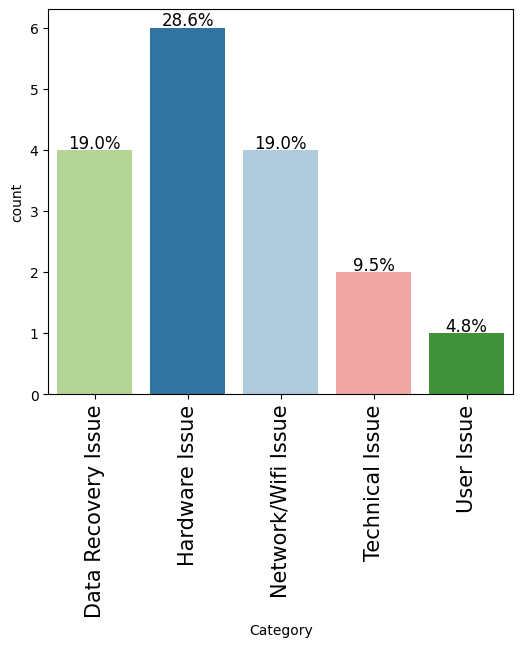

In [ ]:
# Checking the Categories identified by the model and their value counts
print (final_data['Category'].value_counts())
print ("-"*80)

# Plotting bar chart
labeled_barplot(final_data, "Category",True)

High    20
Name: Priority, dtype: int64
--------------------------------------------------------------------------------


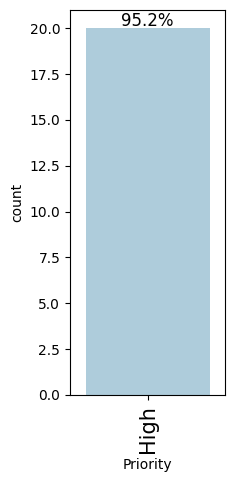

In [ ]:
# Checking the Priority identified by the model and their value counts
print(final_data["Priority"].value_counts())
print ("-"*80)

# Plotting bar chart
labeled_barplot(final_data, "Priority",True)

2-3 business days    15
Immediate             5
Name: ETA, dtype: int64
--------------------------------------------------------------------------------


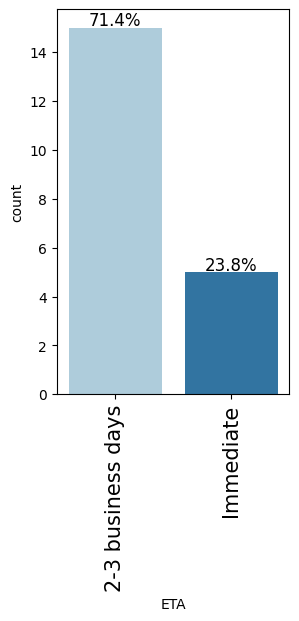

In [ ]:
# Checking the ETA identified by the model and their value counts
print(final_data["ETA"].value_counts())
print ("-"*80)

# Plotting bar chart
labeled_barplot(final_data, "ETA",True)

In [ ]:
# Grouping Tickets by Issue Category and respective ETAs
final_data.groupby(['Category', 'ETA']).support_tick_id.count()

Category             ETA              
Data Recovery Issue  2-3 business days    4
Hardware Issue       2-3 business days    4
                     Immediate            2
Network/Wifi Issue   2-3 business days    2
                     Immediate            1
Technical Issue      2-3 business days    2
User Issue           Immediate            1
Name: support_tick_id, dtype: int64

## **Actionable Insights and Recommendations**

**Insights**

*   75% of the issues are due to Hardware / Network issue / Data recovery.  
*   All recognized issues are classified as High priority due to the nature of the problems
*   25% of the issues require urgent attention or should be resolved in less than 24 hours whilst the remaining should be dealt with in 2-3 days.
*   While vast majority of the issues are due to faulty hardware / software, some issues are related to User having errors
*   The Customers are not really frustrated with the products/service as it is impacting their work.



**Recommendations**

Following should be adopted to improve the product/service

*   User driven issues/errors: Should provide additional training support / material while selling the products.
*   Hardware / Software issues: Additional Quality testing and controls should be put in place.  
*   Network issues: Modem/WiFi routers should be upgraded, and back up lines should be installed to redue outage.
*   General:
    1. More information around the products, usage etc should be collected from the user
    2. Customer service manual / Tool tips should be provided to the customers
    3. Customer servicing personnel should be increased to resolve the issues quickly in the short term, until the root cause of the issues are identified and resolved.



**Thank You!!**
